

# Receiver operating characteristics (ROC) curves
## and their interpretation

# Motivation
Everybody is using  area under the curve (AUC) score 

Tom Fawcet "An introduction to ROC analysis" Pattern Recognition Letters **27** (2006) 861. 

# Content

- Binary classifiers
- Confusion matrix
- ROC curves
- Bayes optimal classifier
- AUC score

# Binary classification

$C(X): \Omega \rightarrow \{0,1\}, \quad \{B,A\}$

$C(X)=\Theta(c(X)-\theta)$

# Confusion matrix

<table style="font-size:1.5em;">
<tr><th></th><th colspan=2>actual</th></tr>
<tr><th>predicted</th><th>A</th><th>B</th></tr>
<tr> <th> A </th> <td>TP</td> <td>FP</td></tr>
<tr> <th> B </th> <td>FN</td> <td>TN</td></tr>
<tr> <th>  </th> <td> #A</td> <td>#B</td></tr>
</table>

# Rates
$
\begin{array}{cccccc}
TPR & = &\frac{TP}{\#A},&\quad FPR & = &\frac{FP}{\#B} \\
FNR & = &\frac{FN}{\#A},&\quad TNR & = &\frac{TN}{\#B} \\
    &   & 1             &\quad     &   & 1 
\end{array}
$

recall _TPR_

precision $\frac{TP}{TP+FP}$ 

accuracy $\frac{TP+TN}{P+N}$

$TPR = \int\text{d}X \, P(X|A) \, C(X)$

$FPR = \int\text{d}X \, P(X|B) \, C(X)$

# Example

Males and females classified from height

In [137]:
mu_M =70*2.54
sigma_M=4*2.54
mu_F = 68*2.54
sigma_F = 3.5*2.54

In [138]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [139]:
num_males = 10000
num_females = 10000
prop_males = num_males/(num_males+num_females)
prop_females = 1-prop_males

In [140]:
dist_M = stats.norm(loc=mu_M, scale=sigma_M)
dist_F = stats.norm(loc=mu_F, scale=sigma_F)

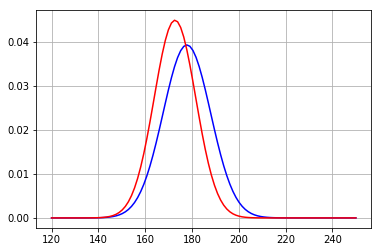

In [141]:
xs = np.linspace(120, 250,100)
plt.plot(xs, dist_M.pdf(xs),'-b')
plt.plot(xs, dist_F.pdf(xs),'-r')
plt.grid(True)
plt.show()

In [142]:
males = dist_M.rvs(size=num_males)
females = dist_F.rvs(size=num_females)

In [143]:
def make_simple_classifier(threshold):
    return lambda h: h>threshold 

In [144]:
is_male = make_simple_classifier(162)

In [145]:
TP = np.sum(is_male(males))
FP = np.sum(is_male(females))
(TP,FP)

(9410, 8814)

# Receiver operating characteristics

TPR vs. FPR

In [146]:
tps=[]
fps=[]
for th in [150, 160, 170, 180]:
    is_male = make_simple_classifier(th)
    TPR  = np.sum(is_male(males))/num_males
    FPR  = np.sum(is_male(females))/num_females
    tps.append(TPR)
    fps.append(FPR) 

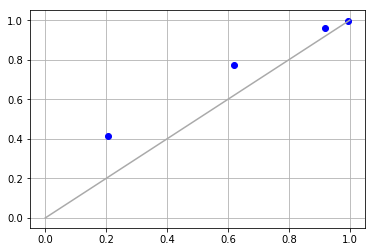

In [147]:
plt.plot(fps, tps, 'ob')
oxs=np.linspace(0,1,10)
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

In [148]:
from sklearn.metrics import  roc_curve

In [149]:
fpr,tpr,th = roc_curve(np.concatenate((np.ones_like(males), 
                                       np.zeros_like(females)) ),
          np.concatenate((males, females)) )

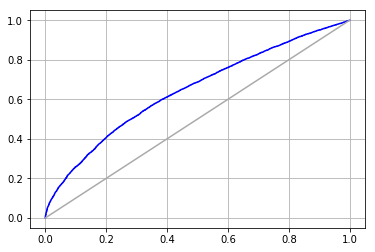

In [150]:
plt.plot(fpr,tpr,'-b')
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

# Small samples

In [151]:
males_s=males[0:20]
females_s=females[0:40]
fpr_s,tpr_s,th_s = roc_curve(np.concatenate((np.ones_like(males_s), np.zeros_like(females_s)) ),
          np.concatenate((males_s, females_s)) )

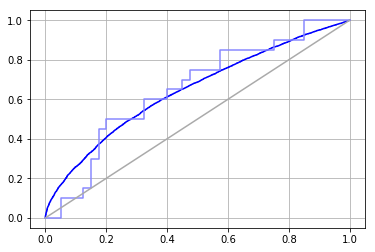

In [152]:
plt.plot(fpr,tpr,'-b')
plt.plot(fpr_s,tpr_s,'-',color='#8888ff')
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

# Calculating ROC

```
S = data sorted by scores - decreasing
FP=0; TP=0;
R=()
S_prev=-infinity
i=0
```

```
while i < |S| do:
 if S[i] != S_prev:
     R.append( (FP/N, TP/P))
     S_prev=S[i]
 if S[i] in A:
     TP += 1
 else:
     FP += 1

R.append((FP/N, TP/P))
```

In [153]:
ms=males[0:6]
fs=females[0:4]
labels=np.concatenate((np.ones_like(ms), np.zeros_like(fs)) )
scores=np.concatenate((ms,fs))
data = np.stack((labels, scores), axis=1)

In [154]:
ind=np.argsort(scores)
data[ind[::-1]]

array([[   1.        ,  189.68893301],
       [   0.        ,  184.09384261],
       [   1.        ,  183.47089832],
       [   0.        ,  182.8878221 ],
       [   1.        ,  180.74449252],
       [   1.        ,  173.04866829],
       [   0.        ,  170.90575134],
       [   1.        ,  168.63356138],
       [   0.        ,  168.05331452],
       [   1.        ,  163.49264314]])

In [155]:
fpr_s,tpr_s,th_s = roc_curve(data[:,0] , data[:,1])

In [156]:
th_s

array([ 189.68893301,  184.09384261,  183.47089832,  182.8878221 ,
        173.04866829,  170.90575134,  168.63356138,  168.05331452,
        163.49264314])

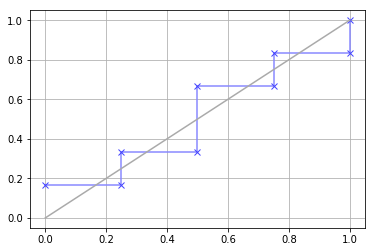

In [157]:
plt.plot(fpr_s,tpr_s,'-',color='#8888ff')
plt.plot(fpr_s,tpr_s,'x',color='#4444ff')
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

# Optimal treshold

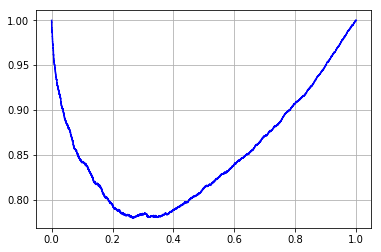

In [158]:
plt.plot(fpr,1-tpr+fpr,'-b')
plt.grid(True)
plt.show()

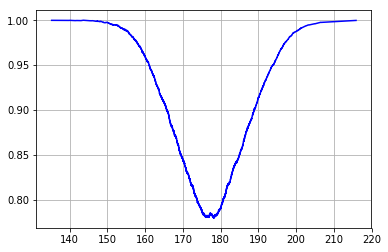

In [159]:
plt.plot(th,1-tpr+fpr,'-b')
plt.grid(True)
plt.show()

# Bayesian classifier

Bayesian classifier is based on the conditional probability that the observed example belongs to class A. 

$P(M|h)$ 

$P(M|h)=  \frac{P(M, h)}{ P(h)}$

$P(M|h) =  \frac{P(h|M) P(M)}{  P(h)}$

$P(M|h) =  \frac{P(h|M) P(M)}{P(h|M) P(M) + P(h|F) P(F)}$

In [160]:
def PM(h):
    num =  prop_males* dist_M.pdf(h)
    return num/(num + prop_females * dist_F.pdf(h))

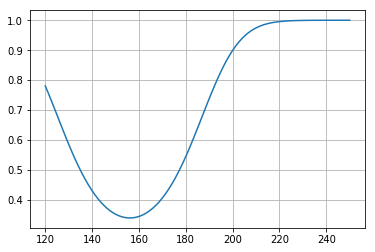

In [161]:
xs=np.linspace(120, 250,100)
plt.plot(xs, PM(xs))
plt.grid(True)
plt.show()

In [162]:
fpr_b, tpr_b, th_b = roc_curve(np.concatenate((np.ones_like(males), np.zeros_like(females)) ),
          PM(np.concatenate((males, females))) )

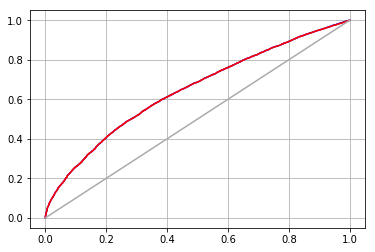

In [163]:
plt.plot(fpr_b,tpr_b,'-b')
plt.plot(fpr,tpr,'-r')
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

# Optimal treshold

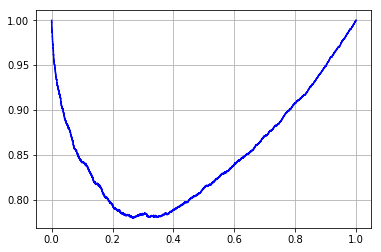

In [164]:
plt.plot(fpr_b,1-tpr_b+fpr_b,'-b')
plt.grid(True)
plt.show()

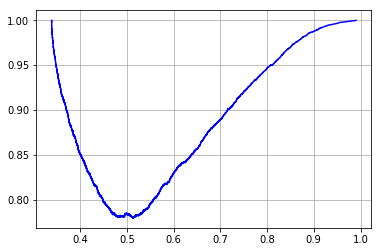

In [165]:
plt.plot(th_b,(1-tpr_b)+fpr_b,'-b')
plt.grid(True)
plt.show()

# Risk

$\rho = c_1 P(A) (1-TPR)   + c_2 P(B) FPR$ 

$P(A|X) > \frac{c_2}{c_1+c_2}$

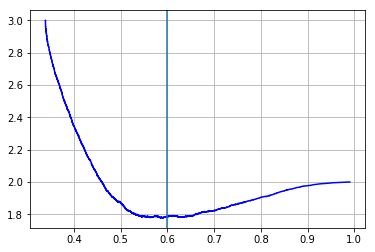

In [166]:
c1=4
c2=6
plt.plot(th_b,c1*prop_males*(1-tpr_b)+c2*prop_females*fpr_b,'-b')
plt.axvline(c2/(c1+c2))
plt.grid(True)
plt.show()

# Area under the ROC curve

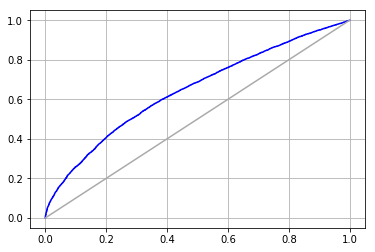

In [167]:
plt.plot(fpr,tpr,'-b')
plt.plot(oxs,oxs,'#aaaaaa')
plt.grid(True)
plt.show()

# Area under the ROC curve

Probability that a random positive will be classified higher then random negative. 

$AUC = \int\text{d}X_A P(X_A|A)\text{d}X_B P(X_B|B) \Theta\left( c(X_A) - c(X_B) \right)$

$AUC = \int_0^1 TPR(FPR) \text{d}FPR$

$AUC = \int_0^\infty \text{d}\theta\; TPR(\theta) \frac{\text{d}FPR(\theta)}{\text{d}\theta}$

$\begin{split}
		AUC & = \int_0^\infty \text{d}\theta
		 \int\text{d}{X_A}\, \Theta(c(X_A) - \theta )P(X_A|A) \\
		&\phantom{\int_0^\infty  } 	\frac{\text{d}}{\text{d}\theta}
		\int\text{d}{X_B}\, \Theta(c(X_B) - \theta )P(X_B|B)  	
	\end{split}$

$\begin{split}
		AUC & = \int_0^\infty \text{d}\theta
		 \int\text{d}{X_A}\, \Theta(c(X_A) - \theta )P(X_A|A) \\
		&\phantom{\int_0^\infty  } 	\frac{\text{d}}{\text{d}\theta}
		\int\text{d}{X_B}\, \Theta(c(X_B) - \theta )P(X_B|B)  	
	\end{split}$

$\begin{split}
		AUC & = \int_0^\infty \text{d}\theta \int\text{d}{X_A}\, \Theta(c(X_A) - \theta )P(X_A|A) \\
		&\phantom{\int_0^\infty  } 	
		\int\text{d}{X_B}\, \delta(c(X_B) - \theta )P(X_B|B)  	
	\end{split}$

In [168]:
from sklearn.metrics import roc_auc_score

In [169]:
roc_auc_score(np.concatenate((np.ones_like(males), np.zeros_like(females)) ),
          np.concatenate((males, females))) 


0.64558526999999999

In [170]:
roc_auc_score(np.concatenate((np.ones_like(males), np.zeros_like(females)) ),
          PM(np.concatenate((males, females))) )

0.64564405999999996